In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Input, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D as Conv2D, MaxPooling2D as MaxPool2D
from tensorflow.keras.layers import BatchNormalization as BatchNorm
import tensorflow.keras.datasets.cifar10 as cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras_flops import get_flops #alternative to ptflops for tensorflow/keras
#using keras sequential (or maybe functional API) to create models because I dont like pytorch

Problem 1 (30pts)

For this homework, we will use CIFAR-10, which comes with all three RGB input channels. Here is the link for loading CIFAR-10:

https://www.datascienceweekly.org/tutorials/cifar10-pytorch-load-cifar10-dataset-from-torchvisionLinks to an external site.

Train the based line VGG model we need for FashinMNIST on CIFAR-10 and report your classification accuracy for validation set, as well as training loss and training accuracy. For this training resize the network input to 64*64 resolution.
Use Table 1 in the VGG paper (Simonyan and Zisserman, 2014) to construct other common models, such as VGG-16 or VGG-19. Train them on CIFAR-10, compare the accuracies, computational complexity and model size.


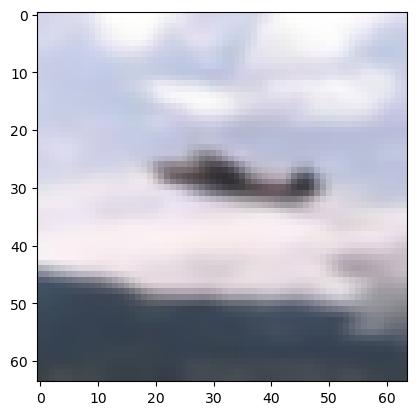

In [2]:
# Load CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#resize images to be 64x64
train_images = tf.image.resize(train_images, (64, 64))
test_images = tf.image.resize(test_images, (64, 64))

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

#test image
plt.imshow(train_images[42069,:,:], cmap='Greys') #display random image

In [11]:
#VGG-11
# Has 5 conv blocks, first two only single conv layer
#last three blocks are FC layers
#64 and double till 512

#input (64x64x3)
inputs = Input(shape=(64,64,3))
x = layers.Conv2D(64, kernel_size=3, padding = 'same', activation='relu')(inputs)
block1 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(128, kernel_size=3, padding = 'same', activation='relu')(block1)
block2 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(block2)
x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(x)
block3 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(block3)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
block4 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(block4)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
block5 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Flatten()(block5)
x = layers.Dense(4096, activation='relu')(x)
#x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu')(x)
#x = layers.Dropout(0.5)(x)

outputs = layers.Dense(10, activation='relu')(x)
#outputs = layers.Softmax()(x)

vgg11 = tf.keras.Model(inputs, outputs)

In [13]:
#vgg16 (model D)
#add 1 conv to each vgg block

#input (64x64x3)
inputs = Input(shape=(64,64,3))
x = layers.Conv2D(64, kernel_size=3, padding = 'same', activation='relu')(inputs)
x = layers.Conv2D(64, kernel_size=3, padding = 'same', activation='relu')(x)
block1 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(128, kernel_size=3, padding = 'same', activation='relu')(block1)
x = layers.Conv2D(128, kernel_size=3, padding = 'same', activation='relu')(x)
block2 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(block2)
x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(x)
block3 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(block3)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
block4 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(block4)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
block5 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Flatten()(block5)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(10, activation='softmax')(x)
#outputs = layers.Softmax()(x)

vgg16 = tf.keras.Model(inputs, outputs)

In [14]:
#vgg19 (model E)
#add one more conv layer to last 3 blocks

#input (64x64x3)
inputs = Input(shape=(64,64,3))
x = layers.Conv2D(64, kernel_size=3, padding = 'same', activation='relu')(inputs)
x = layers.Conv2D(64, kernel_size=3, padding = 'same', activation='relu')(x)
block1 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(128, kernel_size=3, padding = 'same', activation='relu')(block1)
x = layers.Conv2D(128, kernel_size=3, padding = 'same', activation='relu')(x)
block2 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(block2)
x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(x)
block3 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(block3)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
block4 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(block4)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
block5 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Flatten()(block5)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.1)(x)

outputs = layers.Dense(10, activation='softmax')(x)
#outputs = layers.Softmax()(x)

vgg19 = tf.keras.Model(inputs, outputs)

In [12]:
vgg11.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = vgg11.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=30,
                       verbose = 1)

vgg11.summary()
test_loss, test_acc = vgg11.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(vgg11, batch_size=1)
print(f"FLOPS: {flops}")

Epoch 1/30
1250/1250 [==============================] - 19s 15ms/step - loss: 2.2833 - accuracy: 0.1389 - val_loss: 2.1860 - val_accuracy: 0.2339
Epoch 2/30
1250/1250 [==============================] - 18s 15ms/step - loss: 2.0045 - accuracy: 0.3033 - val_loss: 2.0078 - val_accuracy: 0.2756
Epoch 3/30
1250/1250 [==============================] - 19s 15ms/step - loss: 1.4800 - accuracy: 0.4688 - val_loss: 1.2789 - val_accuracy: 0.5363
Epoch 4/30
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1819 - accuracy: 0.5816 - val_loss: 1.0779 - val_accuracy: 0.6222
Epoch 5/30
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9440 - accuracy: 0.6652 - val_loss: 0.9383 - val_accuracy: 0.6701
Epoch 6/30
1250/1250 [==============================] - 18s 15ms/step - loss: 0.7401 - accuracy: 0.7413 - val_loss: 0.8944 - val_accuracy: 0.6913
Epoch 7/30
1250/1250 [==============================] - 18s 15ms/step - loss: 0.5714 - accuracy: 0.8018 - val_loss: 0.8832 -

In [19]:
import PIL
from PIL import Image

#load custom image for testing
image = tf.keras.utils.load_img('dog64.jpg')
input_arr = tf.keras.utils.img_to_array(image)
img_arr = np.array([input_arr])  # Convert single image to a batch.

#standardize to be values from 0 to 1
img_arr = img_arr / 255.0

3

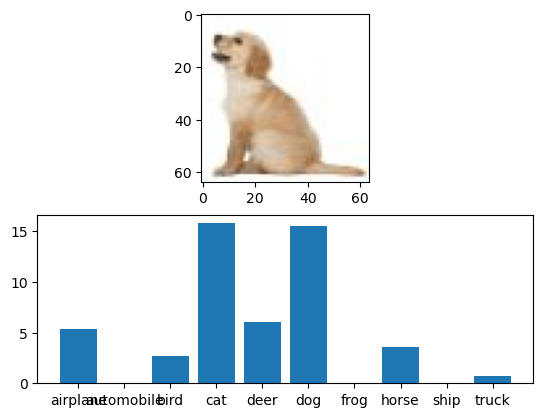

In [20]:
predictions = vgg11.predict(img_arr) #predict for model1

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.subplot(2,1,1)
plt.imshow(img_arr[0,:,:], cmap='Greys')
plt.subplot(2,1,2)
plt.bar(class_names, predictions[0]) #display confidence values as bar plot
np.argmax(predictions)

In [15]:
vgg16.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = vgg16.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=30,
                       verbose = 1)

vgg16.summary()
test_loss, test_acc = vgg16.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(vgg16, batch_size=1)
print(f"FLOPS: {flops}")

Epoch 1/30


C:\Users\curca\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\backend.py:4942: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1250/1250 [==============================] - 33s 26ms/step - loss: 2.3025 - accuracy: 0.1036 - val_loss: 2.3034 - val_accuracy: 0.0977
Epoch 2/30
1250/1250 [==============================] - 33s 26ms/step - loss: 2.3036 - accuracy: 0.1007 - val_loss: 2.3038 - val_accuracy: 0.0977
Epoch 3/30
 304/1250 [======>.......................] - ETA: 23s - loss: 2.3039 - accuracy: 0.0971

KeyboardInterrupt: 

In [8]:
vgg19.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = vgg19.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=30,
                       verbose = 1)

vgg19.summary()
test_loss, test_acc = vgg19.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(vgg19, batch_size=1)
print(f"FLOPS: {flops}")

Epoch 1/30
1250/1250 [==============================] - 39s 31ms/step - loss: 2.3036 - accuracy: 0.0981 - val_loss: 2.3035 - val_accuracy: 0.0980
Epoch 2/30
1250/1250 [==============================] - 38s 31ms/step - loss: 2.3035 - accuracy: 0.0976 - val_loss: 2.3010 - val_accuracy: 0.1542
Epoch 3/30
1250/1250 [==============================] - 38s 31ms/step - loss: 2.3030 - accuracy: 0.1015 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 4/30
1250/1250 [==============================] - 38s 31ms/step - loss: 2.3034 - accuracy: 0.1025 - val_loss: 2.3035 - val_accuracy: 0.1016
Epoch 5/30
1250/1250 [==============================] - 38s 31ms/step - loss: 2.3036 - accuracy: 0.0972 - val_loss: 2.3033 - val_accuracy: 0.0952
Epoch 6/30
1250/1250 [==============================] - 38s 31ms/step - loss: 2.3034 - accuracy: 0.0985 - val_loss: 2.3038 - val_accuracy: 0.0952
Epoch 7/30
1250/1250 [==============================] - 38s 31ms/step - loss: 2.3036 - accuracy: 0.0985 - val_loss: 2.3030 -

313/313 - 3s - loss: 2.3036 - accuracy: 0.1000

Test accuracy: 0.10000000149011612
FLOPS: 3237183498


Problem 2 (30pts)

Use the CIFAR-10 to train a baseline classifier based on the GoogleNet model we did in lectures for 64*64 input resolution. Report your classification accuracy for the validation set, as well as training loss and training accuracy.
Add batch normalization layer to GoogleNet (think about what is the best way of adding it). Train it again. Report your classification accuracy for the validation set, as well as training loss and training accuracy. Compare your accuracy against Problem2.1.
 

In [ ]:
x = layers.Conv2D(64, kernel_size=3, padding = 'same', activation='relu')(x)
block1 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

def inception(input, filters):
    b1 = layers.Conv2D()
    

Problem 3 (40pts)

The baseline model we did in homework is called ResNet-18. Train that for CIFAR-10 and report and compare your validation accuracy against GoogleNet and VGGNet architectures you did. Can you compare the training time, model size and computation complexity across these three networks for CIFAR-10? Use 64*64 resolution across all training.
Build two new versions of ResNet (ResNet-26, and ResNet-32). Train them on CIFAR-10. Plot the training loss, training accuracy and validation accuracy. Compare the classification accuracy, computation complexity, and model size across these three versions of ResNet (18, 26, 32). How does the complexity grow as you increase the network depth?

In [ ]:
def res_block()

inputs = Input(shape(64,64,3))

x = layers.Conv2D(64, kernel_size=7,stride=(2,2),padding='same',activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(3,3),stride=(2,2), padding='same')(x)

x = 